<link rel="stylesheet" href="../../assets/css/notebook-styles.css">

# 📐 Linear Algebra Introduction

<div class="nb-section-header">
<h2>🚀 Interactive Learning Experience</h2>
<p>Welcome to your first deep dive! Today we'll build intuition and hands-on experience with vectors, matrices, and their operations—the foundation of almost every ML algorithm.</p>
</div>

> 💻 **<span class="nb-text-technical">Comprehensive Learning Experience</span>**: This notebook now includes all the theoretical foundations, mathematical derivations, and practical applications in one place. We'll build intuition through consistent examples using user profiles throughout.

---

## 🎯 <span class="nb-text-success">Learning Objectives</span>

<div class="nb-learning-objectives">

<div class="nb-grid-2">

<div class="nb-card">
<h5 class="nb-header-success">🧠 Conceptual Understanding</h5>
<ul class="nb-text-primary">
<li>Understand what vectors and matrices are conceptually and computationally</li>
<li>Explore how these concepts relate to ML models</li>
</ul>
</div>

<div class="nb-card">
<h5 class="nb-header-technical">⚙️ Practical Skills</h5>
<ul class="nb-text-primary">
<li>Learn how to compute dot products and matrix multiplication</li>
<li>Build intuition through hands-on coding and visualization</li>
</ul>
</div>

<div class="nb-card">
<h5 class="nb-header-warning">👁️ Visual Learning</h5>
<ul class="nb-text-primary">
<li>Visualize geometric interpretations of linear transformations</li>
<li>See vectors as arrows in multi-dimensional space</li>
</ul>
</div>

<div class="nb-card">
<h5 class="nb-header-advanced">🤖 ML Applications</h5>
<ul class="nb-text-primary">
<li>Connect mathematical concepts to real machine learning scenarios</li>
<li>Understand the foundation of ML algorithms</li>
</ul>
</div>

</div>
</div>


## 🧠 <span class="nb-text-success">Understanding Vectors: The Foundation of Machine Learning</span>

<div class="nb-concept-definition">
<strong class="nb-text-technical">Before we dive into operations, let's build a deep understanding of <strong>what vectors are</strong> and <strong>why they're absolutely central</strong> to machine learning.</strong>
</div>

<div class="nb-concept-definition">
<strong class="nb-text-technical">Definition:</strong> <span class="nb-text-primary"><strong>Vectors</strong> are the fundamental building blocks of machine learning. At their core, vectors are ordered lists of numbers that represent quantities with both <strong>magnitude</strong> (size) and <strong>direction</strong>. But this simple definition barely scratches the surface of why they're so crucial.</span>
</div>

### 🎯 <span class="nb-text-warning">What Are Vectors?</span>

<div class="nb-example">

<div class="nb-card-accent">
<strong class="nb-text-warning">A vector is much more than just "a list of numbers." It's a mathematical object that represents:</strong>
</div>

<div class="nb-grid-3">

<div class="nb-card nb-text-center">
<h6 class="nb-header-warning">📏 Magnitude</h6>
<p class="nb-text-primary nb-text-sm">How big/long it is</p>
</div>

<div class="nb-card nb-text-center">
<h6 class="nb-header-warning">🧭 Direction</h6>
<p class="nb-text-primary nb-text-sm">Which way it points</p>
</div>

<div class="nb-card nb-text-center">
<h6 class="nb-header-warning">📍 Position</h6>
<p class="nb-text-primary nb-text-sm">Where it lives in multi-dimensional space</p>
</div>

</div>

<div class="nb-insight">
<strong class="nb-text-success">💡 Key Insight:</strong> <span class="nb-text-primary">Think of vectors as <strong>arrows in space</strong> that encode information about data, relationships, and transformations.</span>
</div>

</div>

### 🚀 <span class="nb-text-technical">Why Vectors Are Central to Machine Learning</span>

<div class="nb-math-container">

<div class="nb-card-accent">
<strong class="nb-text-technical nb-text-lg">Every piece of data in ML becomes a vector:</strong>
</div>

#### 🔍 <span class="nb-text-advanced">The Deep Importance of Vectors in Machine Learning</span>

<div class="nb-card-lg">

**<span class="nb-text-advanced">1. 📊 Data Representation</span>**
<div class="nb-card">
<span class="nb-text-primary">Every piece of data in machine learning is ultimately represented as a vector:</span>
<ul class="nb-text-primary">
<li>🖼️ An image is a vector of pixel intensities</li>
<li>📄 A text document becomes a vector of word frequencies or embeddings</li>
<li>👤 A customer profile is a vector of features (age, income, purchase history)</li>
<li>🎵 A song is a vector of audio frequencies over time</li>
</ul>
</div>

**<span class="nb-text-advanced">2. 🌐 Feature Spaces</span>**
<div class="nb-card">
<span class="nb-text-primary">Vectors allow us to place data points in multi-dimensional spaces where:</span>
<ul class="nb-text-primary">
<li>🎯 Similar data points cluster together</li>
<li>👁️ Patterns become geometrically visible</li>
<li>📏 Distances between points represent similarity</li>
<li>🤖 Machine learning algorithms can find decision boundaries</li>
</ul>
</div>

**<span class="nb-text-advanced">3. ⚙️ Mathematical Operations</span>**
<div class="nb-card">
<span class="nb-text-primary">All core ML operations are vector operations:</span>
<ul class="nb-text-primary">
<li><strong class="nb-text-success">Similarity</strong>: Dot products measure how alike two data points are</li>
<li><strong class="nb-text-success">Transformations</strong>: Matrices transform data from one representation to another (e.g., rotating images, encoding data, changing feature spaces)</li>
<li><strong class="nb-text-success">Learning</strong>: Neural networks are chains of vector transformations (e.g., input image [64x64] → hidden layer [128] → output [10] classes)</li>
<li><strong class="nb-text-success">Optimization</strong>: Gradient descent moves through vector spaces to find optimal solutions (e.g., adjusting weights [-0.5, 0.3, 1.2] to reduce prediction error)</li>
</ul>
</div>

</div>
<p/>
<div class="nb-grid-2 nb-margin-bottom-lg">

<div class="nb-card">
<h6 class="nb-header-technical">📸 Images</h6>
<p class="nb-text-primary nb-text-sm">Each pixel's color values → vector of intensities</p>
</div>

<div class="nb-card">
<h6 class="nb-header-technical">📝 Text</h6>
<p class="nb-text-primary nb-text-sm">Word frequencies or embeddings → vector representations</p>
</div>

<div class="nb-card">
<h6 class="nb-header-technical">👤 User Profiles</h6>
<p class="nb-text-primary nb-text-sm">Age, income, preferences → feature vectors</p>
</div>

<div class="nb-card">
<h6 class="nb-header-technical">🎵 Audio</h6>
<p class="nb-text-primary nb-text-sm">Frequency components over time → signal vectors</p>
</div>

<div class="nb-card">
<h6 class="nb-header-technical">🧬 DNA</h6>
<p class="nb-text-primary nb-text-sm">Nucleotide sequences → biological feature vectors</p>
</div>

</div>

<div class="nb-card-accent">
<strong class="nb-text-technical nb-text-lg">All ML algorithms work by:</strong>
<ol class="nb-text-primary nb-margin-top-sm">
<li><strong class="nb-text-success">Representing</strong> data as vectors in high-dimensional spaces</li>
<li><strong class="nb-text-success">Measuring</strong> relationships between vectors (similarity, distance)</li>
<li><strong class="nb-text-success">Transforming</strong> vectors to find patterns and make predictions</li>
<li><strong class="nb-text-success">Learning</strong> optimal vector transformations from data</li>
</ol>
</div>

</div>

#### 👁️ <span class="nb-text-warning">Visual Understanding: Vectors as Arrows in Space</span>

<div class="nb-insight">
<strong class="nb-text-warning">Visualization:</strong> <span class="nb-text-primary">Think of a vector as an arrow that:</span>
<ul class="nb-text-primary nb-margin-top-sm">
<li>🎯 <strong>Starts at the origin</strong> (0,0) in 2D or (0,0,0) in 3D</li>
<li>📍 <strong>Points to a specific location</strong> defined by its coordinates</li>
<li>📏 <strong>Has length</strong> (magnitude) = √(x² + y²) in 2D</li>
<li>🧭 <strong>Has direction</strong> determined by the angle it makes with the axes</li>
</ul>
</div>

#### 📐 <span class="nb-text-technical">Angles Between Vectors: The Heart of Similarity</span>

<div class="nb-math-container">
<div class="nb-card-accent">
<strong class="nb-text-advanced">The angle between two vectors tells us everything about their relationship:</strong>
</div>

<div class="nb-grid-3">

<div class="nb-bg-success-light nb-text-center">
<h5 class="nb-header-success">🎯 θ = 0°</h5>
<div class="nb-card">
<strong class="nb-text-success">Same Direction</strong><br>
<span class="nb-text-primary">Vectors perfectly aligned</span>
<ul class="nb-text-primary nb-text-left nb-margin-top-sm nb-margin-bottom-sm">
<li>✅ Dot product is <strong class="nb-text-success">maximum positive</strong></li>
<li>🤖 ML: Data points are <strong class="nb-text-success">very similar</strong></li>
</ul>
</div>
</div>

<div class="nb-bg-warning-light nb-text-center">
<h5 class="nb-header-warning">⊥ θ = 90°</h5>
<div class="nb-card">
<strong class="nb-text-warning">Perpendicular</strong><br>
<span class="nb-text-primary">Vectors are orthogonal</span>
<ul class="nb-text-primary nb-text-left nb-margin-top-sm nb-margin-bottom-sm">
<li>⚪ Dot product is <strong class="nb-text-warning">zero</strong></li>
<li>🤖 ML: Data points are <strong class="nb-text-warning">unrelated</strong></li>
</ul>
</div>
</div>

<div class="nb-answer-incorrect nb-text-center">
<h5 class="nb-header-error">↔️ θ = 180°</h5>
<div class="nb-card">
<strong class="nb-text-error">Opposite Direction</strong><br>
<span class="nb-text-primary">Vectors anti-aligned</span>
<ul class="nb-text-primary nb-text-left nb-margin-top-sm nb-margin-bottom-sm">
<li>❌ Dot product is <strong class="nb-text-error">maximum negative</strong></li>
<li>🤖 ML: Data points are <strong class="nb-text-error">opposites</strong></li>
</ul>
</div>
</div>

</div>

<div class="nb-insight">
<strong class="nb-text-technical">🚀 Why This Matters in Machine Learning:</strong>
<ul class="nb-text-primary nb-margin-top-sm">
<li>🎯 <strong class="nb-text-technical">Recommendation systems</strong>: Find users with similar preferences (small angles)</li>
<li>📄 <strong class="nb-text-technical">Text analysis</strong>: Measure document similarity using word vectors</li>
<li>🖼️ <strong class="nb-text-technical">Image recognition</strong>: Compare feature vectors to classify objects</li>
<li>🧠 <strong class="nb-text-technical">Neural networks</strong>: Attention mechanisms use vector similarities</li>
</ul>
</div>
</div>

<div class="nb-insight">
<strong class="nb-text-warning">🔬 Let's explore this with concrete examples!</strong>
</div>


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Representing different types of data as vectors
print("=== DATA AS VECTORS ===")

# A simple user profile as a vector [age, income_k, hours_online_per_day]
user1 = np.array([25, 45, 3])  # 25 years old, $45k income, 3 hours online
user2 = np.array([35, 75, 1])  # 35 years old, $75k income, 1 hour online
user3 = np.array([22, 35, 8])  # 22 years old, $35k income, 8 hours online

print("User profiles as vectors:")
print(f"User 1: {user1} (age, income_k, hours_online)")
print(f"User 2: {user2}")
print(f"User 3: {user3}")

# Which users are most similar? We can measure this with vector similarity!
similarity_1_2 = np.dot(user1, user2) / (np.linalg.norm(user1) * np.linalg.norm(user2))
similarity_1_3 = np.dot(user1, user3) / (np.linalg.norm(user1) * np.linalg.norm(user3))

print(f"\nSimilarity between User 1 and User 2: {similarity_1_2:.3f}")
print(f"Similarity between User 1 and User 3: {similarity_1_3:.3f}")
print("Higher values mean more similar users!")

print("\n⚠️  IMPORTANT NOTE ABOUT THESE RESULTS:")
print("These similarity scores aren't very meaningful yet because our data")
print("has different scales: age (20-40), income (30k-80k), hours (1-8).")
print("The income values dominate the calculation!")
print("We'll learn about 'normalization' below to fix this problem.")


=== DATA AS VECTORS ===
User profiles as vectors:
User 1: [25 45  3] (age, income_k, hours_online)
User 2: [35 75  1]
User 3: [22 35  8]

Similarity between User 1 and User 2: 0.996
Similarity between User 1 and User 3: 0.990
Higher values mean more similar users!

⚠️  IMPORTANT NOTE ABOUT THESE RESULTS:
These similarity scores aren't very meaningful yet because our data
has different scales: age (20-40), income (30k-80k), hours (1-8).
The income values dominate the calculation!
We'll learn about 'normalization' below to fix this problem.


### 👁️ <span class="nb-text-warning">Visual Understanding: Vectors as Arrows</span>

<div class="nb-insight">
<strong class="nb-text-warning">Let's visualize vectors to build geometric intuition!</strong>
</div>


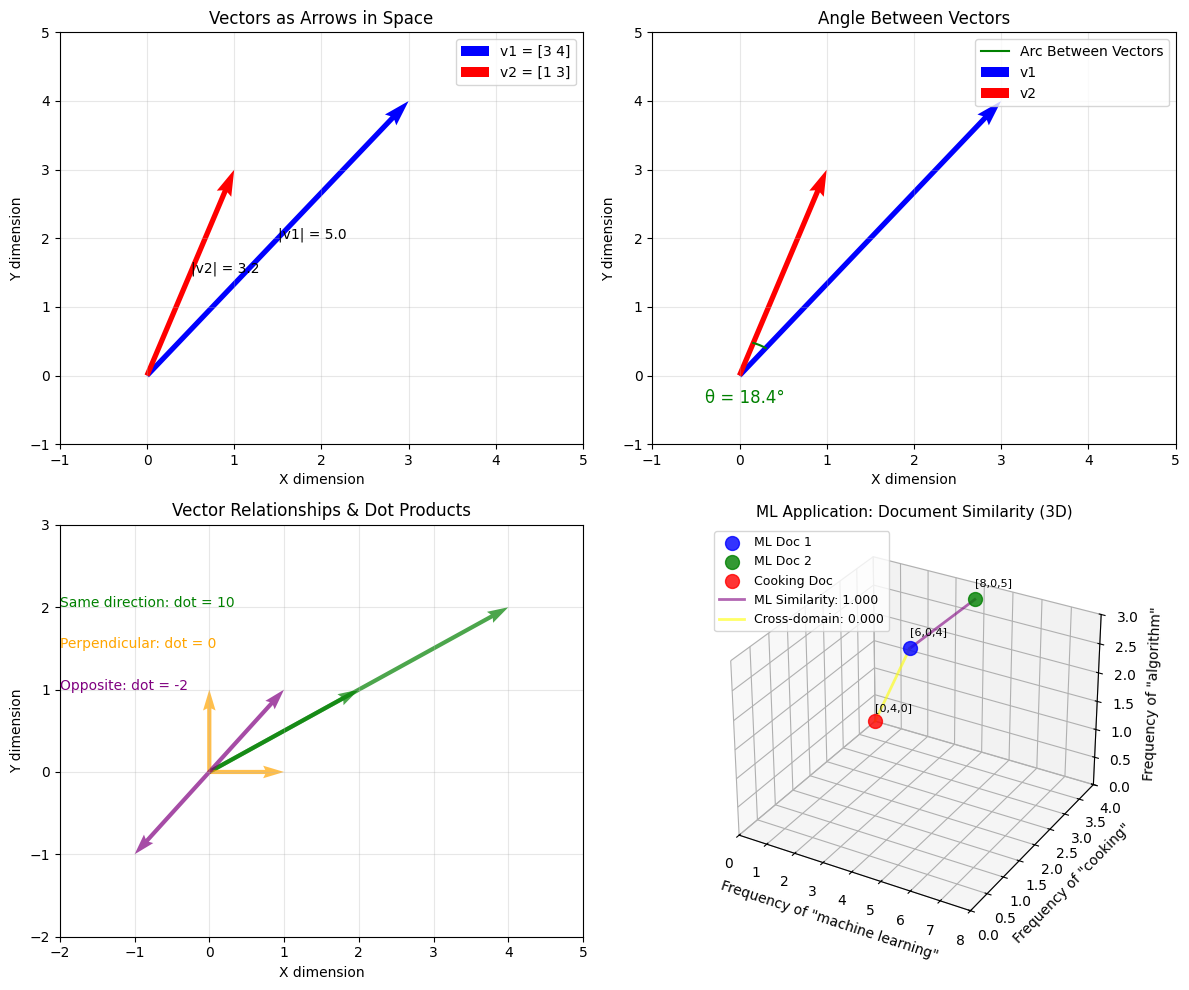


=== KEY INSIGHTS ===
• Vectors encode both magnitude (length) and direction
• Angle between vectors measures their similarity/relationship
• Small angles = high similarity, large angles = low similarity
• 3D visualization shows ALL dimensions, not just projections
• Document vectors: ML docs cluster together, cooking doc is distant
• Algorithm frequency (3rd dimension) adds important context!
• ML algorithms use these geometric relationships to find patterns!


In [17]:
# Create a comprehensive vector visualization
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4, projection='3d')

# Plot 1: Basic vector representation
v1 = np.array([3, 4])
v2 = np.array([1, 3])
ax1.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label=f'v1 = {v1}')
ax1.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label=f'v2 = {v2}')
ax1.set_xlim(-1, 5)
ax1.set_ylim(-1, 5)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Vectors as Arrows in Space')
ax1.set_xlabel('X dimension')
ax1.set_ylabel('Y dimension')

# Add magnitude annotations
ax1.annotate(f'|v1| = {np.linalg.norm(v1):.1f}', xy=(1.5, 2), fontsize=10)
ax1.annotate(f'|v2| = {np.linalg.norm(v2):.1f}', xy=(0.5, 1.5), fontsize=10)

# Plot 2: Angles between vectors

# Compute angle between vectors
dot_product = np.dot(v1, v2)
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)
angle = np.arccos(dot_product / (norm_v1 * norm_v2))

# Determine direction using cross product
cross = v1[0] * v2[1] - v1[1] * v2[0]
if cross < 0:
    angle = -angle  # Clockwise

# Set radius
r = 0.5

# Compute angle of the first vector
theta1 = np.arctan2(v1[1], v1[0])

# Generate the arc
theta = np.linspace(theta1, theta1 + angle, 50)
x = r * np.cos(theta)
y = r * np.sin(theta)

ax2.plot(x, y, color='green', label='Arc Between Vectors')
ax2.text(-0.4, -0.4, f'θ = {np.degrees(angle):.1f}°', fontsize=12, color='green')

ax2.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1,
           color='blue', width=0.01, label='v1')
ax2.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='v2')
ax2.set_xlim(-1, 5)
ax2.set_ylim(-1, 5)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_title('Angle Between Vectors')
ax2.set_xlabel('X dimension')
ax2.set_ylabel('Y dimension')

# Plot 3: Different vector relationships
vectors = {
    'Same direction': ([2, 1], [4, 2], 'green'),
    'Perpendicular': ([1, 0], [0, 1], 'orange'),
    'Opposite': ([1, 1], [-1, -1], 'purple')
}

colors = ['green', 'orange', 'purple']
for i, (label, (v_a, v_b, color)) in enumerate(vectors.items()):
    ax3.quiver(0, 0, v_a[0], v_a[1], angles='xy', scale_units='xy', scale=1,
               color=color, width=0.008, alpha=0.7)
    ax3.quiver(0, 0, v_b[0], v_b[1], angles='xy', scale_units='xy', scale=1,
               color=color, width=0.008, alpha=0.7, linestyle='--')

    # Calculate and display dot product
    dot_prod = np.dot(v_a, v_b)
    ax3.text(-2, 2 - i * 0.5, f'{label}: dot = {dot_prod}', color=color, fontsize=10)

ax3.set_xlim(-2, 5)
ax3.set_ylim(-2, 3)
ax3.grid(True, alpha=0.3)
ax3.set_title('Vector Relationships & Dot Products')
ax3.set_xlabel('X dimension')
ax3.set_ylabel('Y dimension')

# Plot 4: ML Application - Document similarity (3D visualization)
# Simulate word frequency vectors for documents
doc1 = np.array([6, 0, 4])  # [freq_of_'machine learning', 'cooking', 'algorithm']
doc2 = np.array([8, 0, 5])  # Similar document about ML
doc3 = np.array([0, 4, 0])  # Document about cooking

# Calculate similarities
sim_1_2 = np.dot(doc1, doc2) / (np.linalg.norm(doc1) * np.linalg.norm(doc2))
sim_1_3 = np.dot(doc1, doc3) / (np.linalg.norm(doc1) * np.linalg.norm(doc3))

# Visualize in full 3D space (all three dimensions)
ax4.scatter(doc1[0], doc1[1], doc1[2], s=100, color='blue', label='ML Doc 1', alpha=0.8)
ax4.scatter(doc2[0], doc2[1], doc2[2], s=100, color='green', label='ML Doc 2', alpha=0.8)
ax4.scatter(doc3[0], doc3[1], doc3[2], s=100, color='red', label='Cooking Doc', alpha=0.8)

# Draw similarity lines in 3D
ax4.plot([doc1[0], doc2[0]], [doc1[1], doc2[1]], [doc1[2], doc2[2]], 
         'purple', alpha=0.6, linewidth=2, label=f'ML Similarity: {sim_1_2:.3f}')
ax4.plot([doc1[0], doc3[0]], [doc1[1], doc3[1]], [doc1[2], doc3[2]], 
         'yellow', alpha=0.6, linewidth=2, label=f'Cross-domain: {sim_1_3:.3f}')

# Add text annotations for document vectors
ax4.text(doc1[0], doc1[1], doc1[2]+0.2, f'[{doc1[0]},{doc1[1]},{doc1[2]}]', fontsize=8)
ax4.text(doc2[0], doc2[1], doc2[2]+0.2, f'[{doc2[0]},{doc2[1]},{doc2[2]}]', fontsize=8)
ax4.text(doc3[0], doc3[1], doc3[2]+0.2, f'[{doc3[0]},{doc3[1]},{doc3[2]}]', fontsize=8)

ax4.set_xlim(0, 8)
ax4.set_ylim(0, 4)
ax4.set_zlim(0, 3)
ax4.grid(True, alpha=0.3)
ax4.legend(loc='upper left', fontsize=9)
ax4.set_title('ML Application: Document Similarity (3D)', fontsize=11)
ax4.set_xlabel('Frequency of "machine learning"')
ax4.set_ylabel('Frequency of "cooking"')
ax4.set_zlabel('Frequency of "algorithm"')

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print("• Vectors encode both magnitude (length) and direction")
print("• Angle between vectors measures their similarity/relationship")
print("• Small angles = high similarity, large angles = low similarity")
print("• 3D visualization shows ALL dimensions, not just projections")
print("• Document vectors: ML docs cluster together, cooking doc is distant")
print("• Algorithm frequency (3rd dimension) adds important context!")
print("• ML algorithms use these geometric relationships to find patterns!")



### 🎯 <span class="nb-text-neutral">Why Do Vectors Start at the Origin?</span>

<div class="nb-example">

<div class="nb-card-accent">
<strong class="nb-text-warning">You might have noticed that in all our visualizations, vectors start at the origin (0,0). Let's explore <strong>why</strong> this is the case and <strong>whether it's always necessary</strong>.</strong>
</div>

#### 📐 <span class="nb-text-neutral">The Mathematical Reasoning</span>

<div class="nb-card">
<strong class="nb-text-neutral">In our examples, vectors start at the origin (0,0) for practical reasons:</strong>
<ul class="nb-text-primary nb-margin-top-sm">
<li>📐 <strong class="nb-text-neutral">Standard reference point</strong>: Creates consistency for all vector operations</li>
<li>🎓 <strong class="nb-text-neutral">Teaching clarity</strong>: Makes coordinates and position relationship obvious</li>
<li>🧮 <strong class="nb-text-neutral">Simplified calculations</strong>: Coordinates directly give vector components</li>
</ul>
</div>

#### 🤔 <span class="nb-text-neutral">Is the Origin Always (0,0)?</span>

<div class="nb-card-accent">
<strong class="nb-text-neutral">No!</strong> Vectors can start from any point. Let's demonstrate this with code:
</div>

</div>


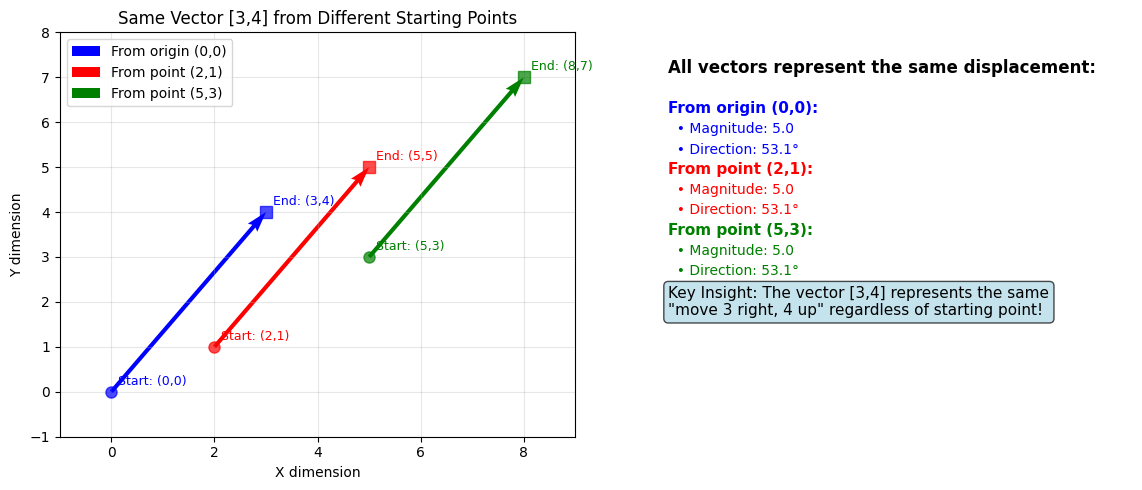

=== UNDERSTANDING VECTOR ORIGINS ===
✓ Vectors represent DISPLACEMENT, not absolute position
✓ The same vector [3,4] has identical magnitude and direction regardless of starting point
✓ We use origin (0,0) in examples for:
  • Teaching clarity
  • Mathematical convenience
  • Standard convention
✓ In real applications, vectors can start from any point!


In [18]:
# Demonstrate that vectors represent displacement, not absolute position
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Same vector [3, 4] starting from different points
vector_displacement = np.array([3, 4])

# Starting points
start_points = [
    (0, 0),  # Origin
    (2, 1),  # Different starting point
    (5, 3),  # Another starting point
]

colors = ['blue', 'red', 'green']
labels = ['From origin (0,0)', 'From point (2,1)', 'From point (5,3)']

# Plot 1: Same vector from different starting points
for i, (start_x, start_y) in enumerate(start_points):
    end_x = start_x + vector_displacement[0]
    end_y = start_y + vector_displacement[1]

    ax1.quiver(start_x, start_y, vector_displacement[0], vector_displacement[1], 
               angles='xy', scale_units='xy', scale=1, 
               color=colors[i], width=0.008, label=labels[i])

    # Mark start and end points
    ax1.plot(start_x, start_y, 'o', color=colors[i], markersize=8, alpha=0.7)
    ax1.plot(end_x, end_y, 's', color=colors[i], markersize=8, alpha=0.7)

    # Add text annotations
    ax1.annotate(f'Start: ({start_x},{start_y})', 
                xy=(start_x, start_y), xytext=(5, 5), 
                textcoords='offset points', fontsize=9, color=colors[i])
    ax1.annotate(f'End: ({end_x},{end_y})', 
                xy=(end_x, end_y), xytext=(5, 5), 
                textcoords='offset points', fontsize=9, color=colors[i])

ax1.set_xlim(-1, 9)
ax1.set_ylim(-1, 8)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Same Vector [3,4] from Different Starting Points')
ax1.set_xlabel('X dimension')
ax1.set_ylabel('Y dimension')

# Plot 2: Demonstrate that all vectors have same magnitude and direction
ax2.text(0.1, 0.9, 'All vectors represent the same displacement:', 
         transform=ax2.transAxes, fontsize=12, weight='bold')

for i, (start_x, start_y) in enumerate(start_points):
    magnitude = np.linalg.norm(vector_displacement)
    direction = np.degrees(np.arctan2(vector_displacement[1], vector_displacement[0]))

    ax2.text(0.1, 0.8 - i*0.15, f'{labels[i]}:', 
             transform=ax2.transAxes, fontsize=11, color=colors[i], weight='bold')
    ax2.text(0.1, 0.75 - i*0.15, f'  • Magnitude: {magnitude:.1f}', 
             transform=ax2.transAxes, fontsize=10, color=colors[i])
    ax2.text(0.1, 0.7 - i*0.15, f'  • Direction: {direction:.1f}°', 
             transform=ax2.transAxes, fontsize=10, color=colors[i])

ax2.text(0.1, 0.3, 'Key Insight: The vector [3,4] represents the same\n"move 3 right, 4 up" regardless of starting point!', 
         transform=ax2.transAxes, fontsize=11, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("=== UNDERSTANDING VECTOR ORIGINS ===")
print("✓ Vectors represent DISPLACEMENT, not absolute position")
print("✓ The same vector [3,4] has identical magnitude and direction regardless of starting point")
print("✓ We use origin (0,0) in examples for:")
print("  • Teaching clarity")
print("  • Mathematical convenience") 
print("  • Standard convention")
print("✓ In real applications, vectors can start from any point!")


### 🌟 <span class="nb-text-advanced">Real-World Applications: Vectors Beyond the Origin</span>

<div class="nb-bg-advanced-light">

<div class="nb-card-accent nb-margin-bottom-lg">
<strong class="nb-text-advanced">Examples where vectors DON'T start at (0,0):</strong>
</div>

<div class="nb-grid-custom nb-margin-bottom-lg">

<div class="nb-card">
<h6 class="nb-text-warning nb-margin-top-0">🚗 Physics - Car Velocity</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>A car at position (100, 50) moving with velocity [20, 10]</li>
<li>The velocity vector starts from the car's current position</li>
</ul>
</div>

<div class="nb-card">
<h6 class="nb-text-warning nb-margin-top-0">🎮 Computer Graphics</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>A game character at (x, y) moving with direction vector [dx, dy]</li>
<li>Movement vector starts from character's current location</li>
</ul>
</div>

<div class="nb-card">
<h6 class="nb-text-success nb-margin-top-0">🧠 Machine Learning</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>User profile [age=25, income=50k] in feature space</li>
<li>The 'origin' might represent average values, not (0,0)</li>
</ul>
</div>

</div>

<div class="nb-insight">
<strong class="nb-text-success">💡 Key Takeaway:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-0">
<li>Vectors are about <strong>DIRECTION and MAGNITUDE</strong>, not starting position!</li>
<li>We use (0,0) in tutorials for simplicity, but vectors work from any point.</li>
</ul>
</div>

</div>


### ⚖️ <span class="nb-text-error">Vector Comparison: Same vs Different Starting Points</span>

<div class="nb-bg-analogy-light">

<div class="nb-card-accent nb-margin-bottom-sm">
<strong class="nb-text-error">❓ Are vectors always compared to the same starting point?</strong> <strong class="nb-text-error">No!</strong> <span class="nb-text-primary">The comparison approach depends on what you're trying to measure.</span>
</div>

<div class="nb-grid-custom nb-margin-top-lg">

<div class="nb-bg-success-light">
<h5 class="nb-text-success nb-margin-top-0">🟢 SAME Starting Point</h5>
<div class="nb-card">
<strong class="nb-text-success">Purpose:</strong> <span class="nb-text-primary">Compare directions and magnitudes directly</span>
<br><br>
<strong class="nb-text-success">Examples:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-sm">
<li>🤖 User preferences</li>
<li>⚡ Force analysis</li>
<li>📊 Data similarity</li>
</ul>
</div>
</div>

<div class="nb-bg-warning-light">
<h5 class="nb-text-warning nb-margin-top-0">🟠 DIFFERENT Starting Points</h5>
<div class="nb-card">
<strong class="nb-text-warning">Purpose:</strong> <span class="nb-text-primary">Compare relative movements or changes</span>
<br><br>
<strong class="nb-text-warning">Examples:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-sm">
<li>🗺️ Navigation</li>
<li>📈 Stock changes</li>
<li>🎮 Game movements</li>
</ul>
</div>
</div>

</div>

<div class="nb-example">
<strong class="nb-text-warning">🔬 Let's explore this with concrete examples!</strong>
</div>

</div>


In [19]:
# Demonstrate vector comparison scenarios
print("=== VECTOR COMPARISON SCENARIOS ===")
print()

# Scenario 1: Same starting point - User profiles (building on our earlier example)
print("🎯 SAME STARTING POINT - User Profiles:")
# Let's use normalized versions of our user data for fair comparison
user_a_norm = np.array([0.5, 0.6, 0.3])  # [age_norm, income_norm, hours_norm]
user_b_norm = np.array([0.7, 0.9, 0.1])  # Normalized to 0-1 scale

similarity = np.dot(user_a_norm, user_b_norm) / (np.linalg.norm(user_a_norm) * np.linalg.norm(user_b_norm))
print(f"   User A (normalized): {user_a_norm} (age, income, hours_online)")
print(f"   User B (normalized): {user_b_norm}")
print(f"   Similarity score: {similarity:.3f}")
print("   → Both start from [0,0,0] baseline to compare profiles directly")
print()

# Scenario 2: Different starting points - Navigation
print("🗺️ DIFFERENT STARTING POINTS - Navigation:")
person_a_location = np.array([10, 20])
person_b_location = np.array([50, 60])
store_location = np.array([15, 23])

vector_a = store_location - person_a_location  # Direction to store from A
vector_b = store_location - person_b_location  # Direction to store from B

print(f"   Person A at {person_a_location} → Store: vector {vector_a}")
print(f"   Person B at {person_b_location} → Store: vector {vector_b}")
print("   → Same destination, different starting points = different vectors")
print()

# Scenario 3: Same starting point - User behavior changes over time
print("📈 SAME STARTING POINT - User Behavior Changes:")
user_a_changes = np.array([0.1, -0.05, 0.15])   # Changes in online hours (normalized)
user_b_changes = np.array([0.05, 0.1, -0.05])   # Changes in online hours (normalized)

correlation = np.corrcoef(user_a_changes, user_b_changes)[0,1]
print(f"   User A changes: {user_a_changes} (Month 1, 2, 3 online hours)")
print(f"   User B changes: {user_b_changes}")
print(f"   Correlation: {correlation:.3f}")
print("   → Both start from 0 baseline to compare behavior patterns")
print()

# Scenario 4: Different starting points - Game physics
print("🎮 DIFFERENT STARTING POINTS - Game Physics:")
player1_pos = np.array([100, 200])
player2_pos = np.array([300, 400])
movement = np.array([10, 0])  # Both move right

print(f"   Player 1 at {player1_pos} moves by {movement}")
print(f"   Player 2 at {player2_pos} moves by {movement}")
print("   → Same movement vector, different starting positions")


=== VECTOR COMPARISON SCENARIOS ===

🎯 SAME STARTING POINT - User Profiles:
   User A (normalized): [0.5 0.6 0.3] (age, income, hours_online)
   User B (normalized): [0.7 0.9 0.1]
   Similarity score: 0.961
   → Both start from [0,0,0] baseline to compare profiles directly

🗺️ DIFFERENT STARTING POINTS - Navigation:
   Person A at [10 20] → Store: vector [5 3]
   Person B at [50 60] → Store: vector [-35 -37]
   → Same destination, different starting points = different vectors

📈 SAME STARTING POINT - User Behavior Changes:
   User A changes: [ 0.1  -0.05  0.15] (Month 1, 2, 3 online hours)
   User B changes: [ 0.05  0.1  -0.05]
   Correlation: -0.891
   → Both start from 0 baseline to compare behavior patterns

🎮 DIFFERENT STARTING POINTS - Game Physics:
   Player 1 at [100 200] moves by [10  0]
   Player 2 at [300 400] moves by [10  0]
   → Same movement vector, different starting positions


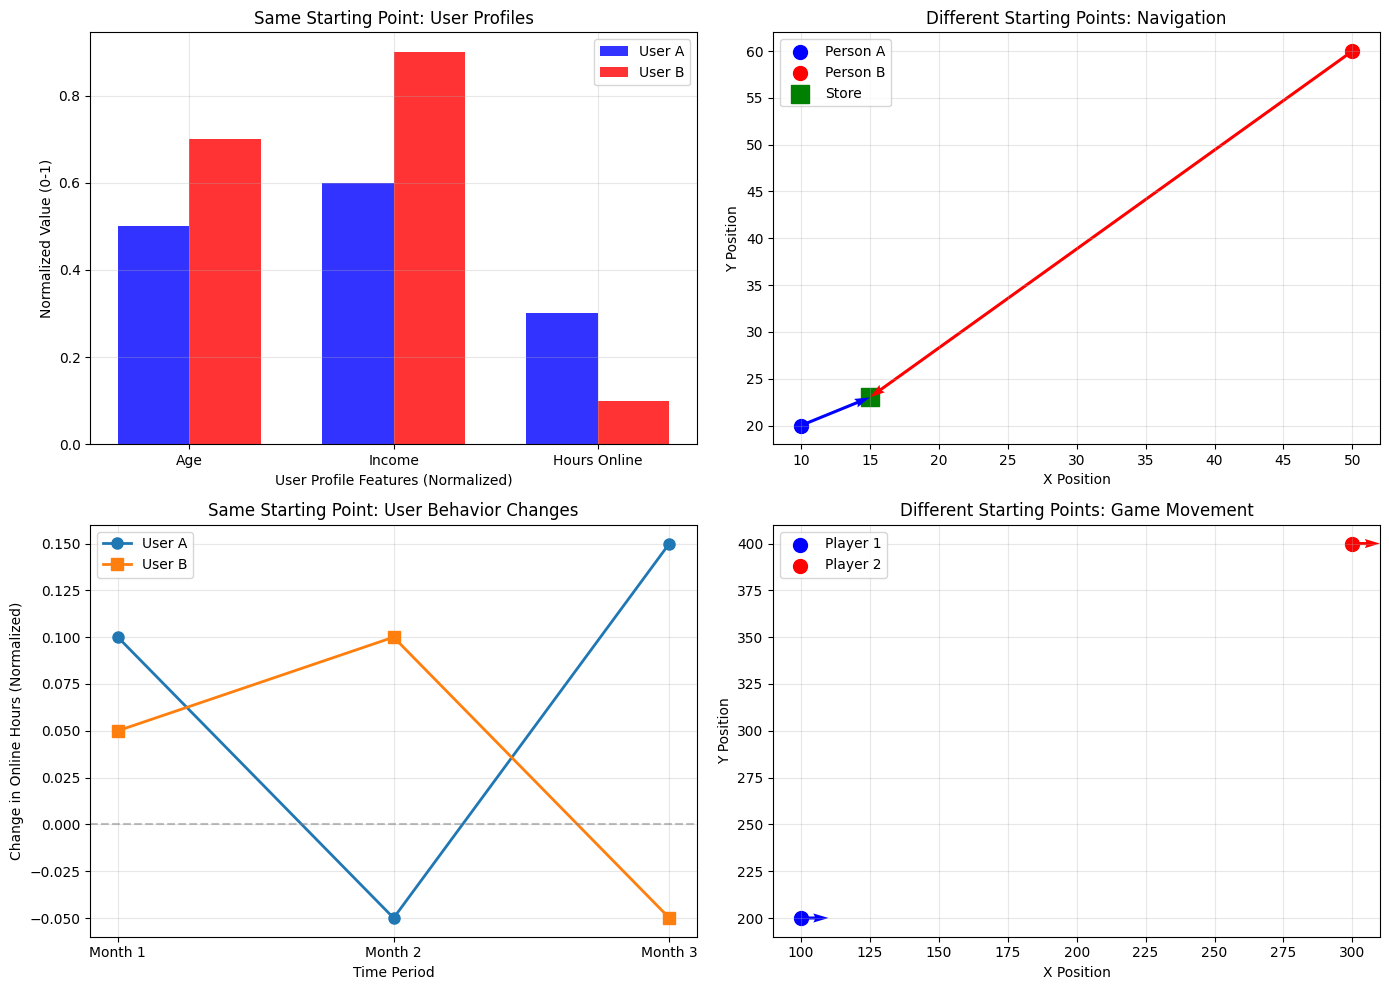


=== KEY INSIGHTS ===
✓ Same starting point → Compare directions/magnitudes directly
✓ Different starting points → Compare relative movements/changes
✓ Choice depends on what you want to measure!
✓ ML often uses same starting point for data similarity
✓ Physics/navigation often use different starting points for movements

🎯 BUILDING ON OUR USER PROFILE THEME:
✓ User profiles [age, income, hours_online] are our consistent example
✓ Normalization is crucial for fair comparisons between features
✓ Without normalization, income values dominate the similarity calculation
✓ All subsequent examples build on this user profile foundation


In [20]:
# Visualize the comparison scenarios
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Same starting point - User profiles (normalized)
categories = ['Age', 'Income', 'Hours Online']
x_pos = np.arange(len(categories))
width = 0.35

ax1.bar(x_pos - width/2, user_a_norm, width, label='User A', alpha=0.8, color='blue')
ax1.bar(x_pos + width/2, user_b_norm, width, label='User B', alpha=0.8, color='red')
ax1.set_xlabel('User Profile Features (Normalized)')
ax1.set_ylabel('Normalized Value (0-1)')
ax1.set_title('Same Starting Point: User Profiles')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Different starting points - Navigation
ax2.scatter(*person_a_location, s=100, color='blue', label='Person A', marker='o')
ax2.scatter(*person_b_location, s=100, color='red', label='Person B', marker='o')
ax2.scatter(*store_location, s=150, color='green', label='Store', marker='s')

# Draw vectors to store
ax2.quiver(person_a_location[0], person_a_location[1], vector_a[0], vector_a[1], 
           angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)
ax2.quiver(person_b_location[0], person_b_location[1], vector_b[0], vector_b[1], 
           angles='xy', scale_units='xy', scale=1, color='red', width=0.005)

ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
ax2.set_title('Different Starting Points: Navigation')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Same starting point - User behavior changes
months = ['Month 1', 'Month 2', 'Month 3']
ax3.plot(months, user_a_changes, 'o-', label='User A', linewidth=2, markersize=8)
ax3.plot(months, user_b_changes, 's-', label='User B', linewidth=2, markersize=8)
ax3.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Change in Online Hours (Normalized)')
ax3.set_title('Same Starting Point: User Behavior Changes')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Different starting points - Game physics
ax4.scatter(*player1_pos, s=100, color='blue', label='Player 1', marker='o')
ax4.scatter(*player2_pos, s=100, color='red', label='Player 2', marker='o')

# Show movement vectors
ax4.quiver(player1_pos[0], player1_pos[1], movement[0], movement[1], 
           angles='xy', scale_units='xy', scale=1, color='blue', width=0.005)
ax4.quiver(player2_pos[0], player2_pos[1], movement[0], movement[1], 
           angles='xy', scale_units='xy', scale=1, color='red', width=0.005)

ax4.set_xlabel('X Position')
ax4.set_ylabel('Y Position')
ax4.set_title('Different Starting Points: Game Movement')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print("✓ Same starting point → Compare directions/magnitudes directly")
print("✓ Different starting points → Compare relative movements/changes")
print("✓ Choice depends on what you want to measure!")
print("✓ ML often uses same starting point for data similarity")
print("✓ Physics/navigation often use different starting points for movements")
print()
print("🎯 BUILDING ON OUR USER PROFILE THEME:")
print("✓ User profiles [age, income, hours_online] are our consistent example")
print("✓ Normalization is crucial for fair comparisons between features")
print("✓ Without normalization, income values dominate the similarity calculation")
print("✓ All subsequent examples build on this user profile foundation")


### 🌟 <span class="nb-text-advanced">Building Consistent Examples: User Profile Journey</span>

<div class="nb-bg-advanced-light">

<div class="nb-card-accent nb-margin-bottom-lg">
<strong class="nb-text-advanced">Throughout this notebook, we'll build on the same user profile example to show how linear algebra concepts connect and build upon each other.</strong>
</div>

#### 🎯 <span class="nb-text-error">Our Consistent Example: E-commerce User Profiles</span>

<div class="nb-bg-analogy-light">

<div class="nb-card-accent nb-margin-bottom-sm">
<strong class="nb-text-error">Let's imagine we're building a recommendation system for an e-commerce platform. Each user can be represented as a vector with features like:</strong>
</div>

<div class="nb-grid-custom nb-margin-top-lg">

<div class="nb-bg-success-light">
<h5 class="nb-text-success nb-margin-top-0">🟢 User Profile Vector</h5>
<div class="nb-card">
<strong class="nb-text-success">Components:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-sm">
<li>📅 Age (normalized 0-1)</li>
<li>💰 Income level (normalized 0-1)</li>
<li>⏰ Hours online per day (normalized 0-1)</li>
<li>🛒 Purchase frequency (normalized 0-1)</li>
</ul>
</div>
</div>

<div class="nb-bg-warning-light">
<h5 class="nb-text-warning nb-margin-top-0">🟠 Example Users</h5>
<div class="nb-card">
<strong class="nb-text-warning">Sample Profiles:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-sm nb-text-sm">
<li><strong>Young Tech User:</strong> [0.2, 0.6, 0.8, 0.7]</li>
<li><strong>Middle-aged Professional:</strong> [0.6, 0.9, 0.3, 0.4]</li>
<li><strong>Senior Casual User:</strong> [0.9, 0.7, 0.2, 0.3]</li>
</ul>
</div>
</div>

</div>

<div class="nb-concept-definition">
<strong class="nb-text-technical">🚀 How We'll Use This Example:</strong>
<ul class="nb-text-primary nb-margin-top-sm">
<li>🎯 <strong class="nb-text-technical">Vector operations</strong>: Compare user similarity using dot products</li>
<li>📐 <strong class="nb-text-technical">Projections</strong>: Find how much a user aligns with specific behavior patterns</li>
<li>🔍 <strong class="nb-text-technical">Angles</strong>: Measure user similarity for recommendations</li>
<li>🧮 <strong class="nb-text-technical">Transformations</strong>: Apply different weighting schemes to features</li>
</ul>
</div>

</div>

#### 🌍 <span class="nb-text-neutral">Real-World Applications Beyond User Profiles</span>

<div class="nb-analogy">

<div class="nb-grid-custom">

<div class="nb-bg-success-light">
<h5 class="nb-text-success nb-margin-top-0">🎯 Same Starting Point Examples</h5>
<div class="nb-card">
<strong class="nb-text-success">When to use:</strong> <span class="nb-text-primary">Compare directions and magnitudes directly</span>
<ul style="color: #424242; margin: 10px 0; font-size: 0.9em;">
<li>🤖 <strong>ML similarity</strong>: User preference vectors from "neutral"</li>
<li>📊 <strong>Data analysis</strong>: Feature vectors from common baseline</li>
<li>🎵 <strong>Music recommendation</strong>: Genre preference vectors</li>
</ul>
</div>
</div>

<div class="nb-bg-warning-light">
<h5 class="nb-text-warning nb-margin-top-0">🟠 Different Starting Points Examples</h5>
<div class="nb-card">
<strong class="nb-text-warning">When to use:</strong> <span class="nb-text-primary">Compare relative movements or changes</span>
<ul style="color: #424242; margin: 10px 0; font-size: 0.9em;">
<li>🗺️ <strong>Navigation</strong>: GPS directions from different locations</li>
<li>📈 <strong>Stock analysis</strong>: Price changes from different dates</li>
<li>🎮 <strong>Game development</strong>: Character movements from current positions</li>
</ul>
</div>
</div>

</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<h5 class="nb-text-advanced nb-margin-top-0">📋 Detailed Examples</h5>

<div style="background-color: #E8F5E8; border-radius: 8px; padding: 15px; margin: 15px 0;">
<h6 style="color: #2E7D32;">🎯 Same Starting Point - Recommendation Systems</h6>
<div style="background-color: #FFFFFF; padding: 12px; border-radius: 5px; font-family: monospace;">
<span class="nb-text-technical">User A likes:</span> [Comedy: <span style="color: #4CAF50;">5</span>, Action: <span style="color: #FF9800;">2</span>, Drama: <span style="color: #F44336;">1</span>]<br>
<span class="nb-text-technical">User B likes:</span> [Comedy: <span style="color: #4CAF50;">4</span>, Action: <span style="color: #FF9800;">1</span>, Drama: <span style="color: #F44336;">3</span>]<br>
<span class="nb-text-primary">Both vectors start from [0,0,0] to compare preferences directly</span>
</div>
</div>

<div style="background-color: #FFF3E0; border-radius: 8px; padding: 15px; margin: 15px 0;">
<h6 style="color: #F57C00;">🗺️ Different Starting Points - Navigation</h6>
<div style="background-color: #FFFFFF; padding: 12px; border-radius: 5px; font-family: monospace;">
<span class="nb-text-technical">Person A</span> at (10,20) → store: vector [<span style="color: #4CAF50;">5,3</span>]<br>
<span class="nb-text-technical">Person B</span> at (50,60) → same store: vector [<span style="color: #F44336;">-35,-37</span>]<br>
<span class="nb-text-primary">Same destination, different starting points, different vectors</span>
</div>
</div>

<div style="background-color: #E3F2FD; border-radius: 8px; padding: 15px; margin: 15px 0;">
<h6 style="color: #1976D2;">💹 Same Starting Point - Stock Performance</h6>
<div style="background-color: #FFFFFF; padding: 12px; border-radius: 5px; font-family: monospace;">
<span class="nb-text-technical">Stock A:</span> [Week1: <span style="color: #4CAF50;">+2%</span>, Week2: <span style="color: #F44336;">-1%</span>, Week3: <span style="color: #4CAF50;">+3%</span>]<br>
<span class="nb-text-technical">Stock B:</span> [Week1: <span style="color: #4CAF50;">+1%</span>, Week2: <span style="color: #4CAF50;">+2%</span>, Week3: <span style="color: #F44336;">-1%</span>]<br>
<span class="nb-text-primary">Both start from 0% baseline to compare performance patterns</span>
</div>
</div>

</div>

</div>

</div>


## 📌 <span style="color: #795548;">Vectors and Basic Operations</span>

<div class="nb-analogy">

<div style="background-color: #FFFFFF; border-left: 4px solid #795548; padding: 15px; border-radius: 5px;">
<strong style="color: #5D4037;">Let's continue with our user profile theme and explore basic vector operations.</strong>
</div>

</div>

In [15]:
import numpy as np

# Define two user profiles (simplified to 2D for visualization)
user_profile_1 = np.array([0.4, 0.6])  # [age_normalized, income_normalized]
user_profile_2 = np.array([0.8, 0.3])  # Different user profile

# Calculate magnitudes
magnitude_1 = np.linalg.norm(user_profile_1)
magnitude_2 = np.linalg.norm(user_profile_2)

# Example: Combining user profiles to get average preferences
average_profile = (user_profile_1 + user_profile_2) / 2
print("Average user profile:", average_profile)
print("→ Useful for finding typical user characteristics in a segment")

# Example: Scaling features to boost or dampen their importance
importance_weights = np.array([2.0, 0.5])  # Age twice as important, income half as important
weighted_profile = user_profile_1 * importance_weights
print("\nOriginal profile:", user_profile_1)
print("Weighted profile:", weighted_profile)
print("→ Useful for customizing recommendation importance")

print("\nUser Profile Magnitudes:")
print(f"User Profile 1 magnitude: {magnitude_1:.3f}")
print(f"User Profile 2 magnitude: {magnitude_2:.3f}")

print("\nReal-world applications:")
print("1. User segmentation: Combine similar profiles to find archetypes")
print("2. Feature importance: Scale features based on business priorities")
print("3. A/B testing: Average profiles to compare user segments")
print("4. Personalization: Weight features based on user preferences")

Average user profile: [0.6  0.45]
→ Useful for finding typical user characteristics in a segment

Original profile: [0.4 0.6]
Weighted profile: [0.8 0.3]
→ Useful for customizing recommendation importance

User Profile Magnitudes:
User Profile 1 magnitude: 0.721
User Profile 2 magnitude: 0.854

Real-world applications:
1. User segmentation: Combine similar profiles to find archetypes
2. Feature importance: Scale features based on business priorities
3. A/B testing: Average profiles to compare user segments
4. Personalization: Weight features based on user preferences


## ⚫ <span style="color: #4CAF50;">Dot Product</span>

<div style="background-color: #E8F5E8; border-radius: 10px; padding: 20px; margin: 20px 0;">

<div style="background-color: #FFFFFF; border-left: 4px solid #4CAF50; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
<h4 style="color: #2E7D32; margin-top: 0;">📐 Formula</h4>
<div style="text-align: center; font-size: 1.3em; margin: 20px 0; padding: 15px; background-color: #F1F8E9; border-radius: 8px;">
<strong class="nb-text-success">𝐚 · 𝐛 = ||𝐚|| ||𝐛|| cos(θ)</strong>
</div>
<p style="color: #2E7D32; text-align: center; margin: 0;">The dot product tells us how aligned two vectors are.</p>

<div style="text-align: center; font-size: 1.2em; margin: 20px 0; padding: 15px; background-color: #E8F5E8; border-radius: 8px;">
<strong class="nb-text-success">Alternative computational form:</strong><br>
<strong class="nb-text-success">𝐚 · 𝐛 = a₁b₁ + a₂b₂ + ... + aₙbₙ</strong>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px;">
<h4 style="color: #388E3C; margin-top: 0;">🔍 Breaking Down This Notation:</h4>

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px; margin-top: 15px;">

<div style="background-color: #E3F2FD; border-radius: 8px; padding: 15px;">
<h5 style="color: #1976D2; margin-top: 0;">📊 <strong>a</strong> · <strong>b</strong></h5>
<ul style="color: #424242; margin: 0;">
<li>The dot product of vectors <strong>a</strong> and <strong>b</strong></li>
<li>Read as "<strong class="nb-text-technical">a dot b</strong>"</li>
<li>The · symbol represents the dot product operation</li>
<li><strong>Bold letters</strong> indicate vectors (not scalars)</li>
</ul>
</div>

<div style="background-color: #F3E5F5; border-radius: 8px; padding: 15px;">
<h5 style="color: #7B1FA2; margin-top: 0;">📏 ||<strong>a</strong>||, ||<strong>b</strong>||</h5>
<ul style="color: #424242; margin: 0;">
<li>The magnitude (length) of vectors</li>
<li>Double pipes || || mean "<strong class="nb-text-advanced">length of</strong>"</li>
<li>Also written as |<strong>a</strong>| or <strong>length</strong>(<strong>a</strong>)</li>
<li>Always positive values</li>
</ul>
</div>

<div class="nb-bg-warning-light">
<h5 class="nb-text-warning nb-margin-top-0">📐 cos(θ)</h5>
<ul style="color: #424242; margin: 0;">
<li>Cosine of the angle between vectors</li>
<li>cos is the cosine trigonometric function</li>
<li>θ (theta) = angle between <strong>a</strong> and <strong>b</strong></li>
<li>Range: -1 to +1</li>
</ul>
</div>

<div style="background-color: #FFEBEE; border-radius: 8px; padding: 15px;">
<h5 style="color: #D32F2F; margin-top: 0;">🎯 Geometric Meaning</h5>
<ul style="color: #424242; margin: 0;">
<li>Measures <strong style="color: #D32F2F;">alignment</strong> between vectors</li>
<li>Equals projection of one vector onto another</li>
<li>Maximum when vectors point same direction</li>
<li>Zero when vectors are perpendicular</li>
</ul>
</div>

</div>

<div class="nb-concept-definition">
<strong class="nb-text-technical">📊 What This Means:</strong>
<ul class="nb-text-primary nb-margin-top-sm nb-margin-bottom-0">
<li>When vectors point in the <strong>same direction</strong> (θ = 0°): cos(0°) = 1, maximum dot product</li>
<li>When vectors are <strong>perpendicular</strong> (θ = 90°): cos(90°) = 0, dot product = 0</li>
<li>When vectors point in <strong>opposite directions</strong> (θ = 180°): cos(180°) = -1, negative dot product</li>
</ul>
</div>

</div>
</div>


Dot product of user profiles: 0.5
Angle between user profiles: 35.8 degrees
Smaller angles mean more similar users!


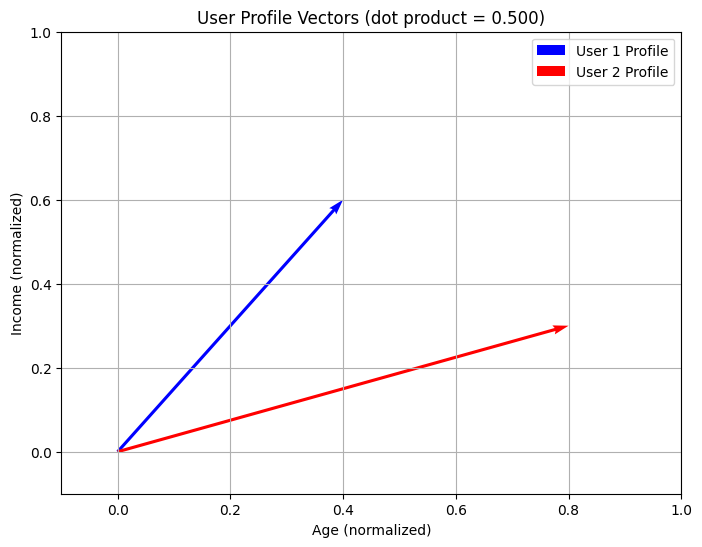

User Profile 1 · User Profile 1 = 0.520
||User Profile 1||² = 0.520
They're equal! This is always true.


In [16]:
# Compute dot product between user profiles
dot = np.dot(user_profile_1, user_profile_2)
print("Dot product of user profiles:", dot)

# Let's explore the geometric meaning
import matplotlib.pyplot as plt

# Visualize the user profile vectors
plt.figure(figsize=(8, 6))
plt.quiver(0, 0, user_profile_1[0], user_profile_1[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', label='User 1 Profile', width=0.005)
plt.quiver(0, 0, user_profile_2[0], user_profile_2[1], angles='xy', scale_units='xy', scale=1, 
           color='red', label='User 2 Profile', width=0.005)

# Calculate angle between user profile vectors
angle = np.arccos(dot / (np.linalg.norm(user_profile_1) * np.linalg.norm(user_profile_2)))
print(f"Angle between user profiles: {np.degrees(angle):.1f} degrees")
print("Smaller angles mean more similar users!")

plt.xlim(-0.1, 1.0)
plt.ylim(-0.1, 1.0)
plt.grid(True)
plt.legend()
plt.xlabel('Age (normalized)')
plt.ylabel('Income (normalized)')
plt.title(f'User Profile Vectors (dot product = {dot:.3f})')
plt.show()

# Special case: dot product with itself gives squared magnitude
profile1_squared = np.dot(user_profile_1, user_profile_1)
profile1_magnitude_squared = np.linalg.norm(user_profile_1)**2
print(f"User Profile 1 · User Profile 1 = {profile1_squared:.3f}")
print(f"||User Profile 1||² = {profile1_magnitude_squared:.3f}")
print("They're equal! This is always true.")


<div class="nb-bg-advanced-light">

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<strong class="nb-text-advanced">🧪 Quiz:</strong> <span class="nb-text-primary">What is the geometric meaning of a dot product?</span>
<ul class="nb-text-primary nb-margin-top-sm">
<li>A. The angle between vectors</li>
<li>B. The projection of one vector onto another</li>
<li>C. A measure of similarity/alignment</li>
<li>D. All of the above</li>
</ul>
<div style="color: #2E7D32; background-color: #E8F5E8; border-left: 4px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 5px;">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">D. All of the above! The dot product encodes the angle between vectors, can be used to compute projections, and serves as a similarity measure.</span>
</div>
</div>

</div>


## 🎯 <span style="color: #FF5722;">Vector Projection: Hands-On Practice</span>

<div style="background-color: #FFF3E0; border-radius: 10px; padding: 20px; margin: 20px 0;">

<div style="background-color: #FFFFFF; border-left: 4px solid #FF5722; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
<strong style="color: #D84315; font-size: 1.1em;">Vector projection</strong> is one of the most important concepts in linear algebra and machine learning.<br/>
It answers the question: <strong style="color: #FF5722;">"How much of vector <strong>a</strong> lies in the direction of vector <strong>b</strong>?"</strong>
</div>

#### 🔍 <span style="color: #E65100;">What is Vector Projection?</span>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px; margin: 15px 0;">
<div style="background-color: #FFF8E1; border-left: 4px solid #FFC107; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
<strong class="nb-text-warning">💡 Intuition:</strong> <span class="nb-text-primary">The <strong>projection</strong> of vector <strong>a</strong> onto vector <strong>b</strong> is the "shadow" that <strong>a</strong> casts onto <strong>b</strong> when light shines perpendicular to <strong>b</strong>.</span>
</div>

<h5 style="color: #D84315; margin-top: 20px;">📐 Vector Projection Formula:</h5>
<div style="text-align: center; font-size: 1.2em; margin: 20px 0; padding: 15px; background-color: #FFEBEE; border-radius: 8px;">
<strong class="nb-text-warning">proj<sub>𝐛</sub> 𝐚 = (𝐚 · 𝐛 / ||𝐛||²) 𝐛</strong>
</div>

<div class="nb-grid-custom nb-margin-top-lg">

<div style="background-color: #E3F2FD; border-radius: 8px; padding: 15px;">
<h6 class="nb-text-technical nb-margin-top-0">📊 proj<sub>𝐛</sub> 𝐚</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>Read as "projection of <strong>a</strong> onto <strong>b</strong>"</li>
<li>proj = projection operation</li>
<li>Subscript <strong>b</strong> = target direction</li>
<li><strong>a</strong> = source vector</li>
</ul>
</div>

<div style="background-color: #F3E5F5; border-radius: 8px; padding: 15px;">
<h6 class="nb-text-advanced nb-margin-top-0">⚫ 𝐚 · 𝐛</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>Dot product of vectors</li>
<li>Measures alignment</li>
<li>Key component of projection</li>
<li>Can be positive, negative, or zero</li>
</ul>
</div>

<div class="nb-bg-success-light">
<h6 class="nb-text-success nb-margin-top-0">📏 ||𝐛||²</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>Squared magnitude of <strong>b</strong></li>
<li>Normalizes the projection</li>
<li>Always positive</li>
<li>Ensures correct scaling</li>
</ul>
</div>

<div class="nb-bg-warning-light">
<h6 class="nb-text-warning nb-margin-top-0">🎯 𝐛</h6>
<ul class="nb-text-primary nb-margin-0 nb-text-sm">
<li>Direction vector</li>
<li>Defines projection direction</li>
<li>Result is parallel to this</li>
<li>Bold = vector notation</li>
</ul>
</div>

</div>

<h5 style="color: #D84315; margin-top: 25px;">📏 Scalar Projection Formula:</h5>
<div style="text-align: center; font-size: 1.2em; margin: 20px 0; padding: 15px; background-color: #E8F5E8; border-radius: 8px;">
<strong class="nb-text-success">comp<sub>𝐛</sub> 𝐚 = (𝐚 · 𝐛) / ||𝐛|| = ||𝐚|| cos(θ)</strong>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<div style="display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 10px;">

<div style="background-color: #E1F5FE; border-radius: 6px; padding: 12px;">
<h6 style="color: #0277BD; margin-top: 0; font-size: 0.9em;">📐 comp<sub>𝐛</sub> 𝐚</h6>
<p style="color: #424242; margin: 0; font-size: 0.8em;">Component of <strong>a</strong> in direction <strong>b</strong> (just the length)</p>
</div>

<div style="background-color: #F3E5F5; border-radius: 6px; padding: 12px;">
<h6 style="color: #7B1FA2; margin-top: 0; font-size: 0.9em;">📏 ||𝐚||</h6>
<p style="color: #424242; margin: 0; font-size: 0.8em;">Magnitude of vector <strong>a</strong></p>
</div>

<div style="background-color: #FFF3E0; border-radius: 6px; padding: 12px;">
<h6 style="color: #F57C00; margin-top: 0; font-size: 0.9em;">📐 cos(θ)</h6>
<p style="color: #424242; margin: 0; font-size: 0.8em;">Cosine of angle between vectors</p>
</div>

</div>
</div>

</div>

#### 🚀 <span style="color: #1976D2;">Why Projection Matters in Machine Learning</span>

<div style="background-color: #E3F2FD; border-radius: 10px; padding: 20px; margin: 20px 0;">
<div class="nb-grid-custom">

<div class="nb-card">
<h5 style="color: #1976D2; margin-top: 0;">🔬 Feature Extraction</h5>
<p style="color: #424242; margin: 0;">Project high-dimensional data onto lower dimensions (PCA)</p>
</div>

<div class="nb-card">
<h5 style="color: #1976D2; margin-top: 0;">📏 Similarity Measurement</h5>
<p style="color: #424242; margin: 0;">How much two data points align in a specific direction</p>
</div>

<div class="nb-card">
<h5 style="color: #1976D2; margin-top: 0;">📈 Regression</h5>
<p style="color: #424242; margin: 0;">Find the best-fit line by projecting data points</p>
</div>

<div class="nb-card">
<h5 style="color: #1976D2; margin-top: 0;">🧠 Neural Networks</h5>
<p style="color: #424242; margin: 0;">Attention mechanisms compute projections to focus on relevant information</p>
</div>

</div>
</div>

</div>


In [17]:
# Let's compute and visualize vector projections
def project_vector(a, b):
    """Project vector a onto vector b"""
    # Scalar projection (length of the shadow)
    scalar_proj = np.dot(a, b) / np.linalg.norm(b)

    # Vector projection (the actual shadow vector)
    vector_proj = (np.dot(a, b) / np.dot(b, b)) * b

    return scalar_proj, vector_proj

# Example: Project one user profile onto another
user_a = np.array([0.6, 0.8])  # User A: [age_norm, income_norm]
user_b = np.array([1.0, 0.0])  # Reference direction: pure age dimension

scalar_proj, vector_proj = project_vector(user_a, user_b)

print("=== USER PROFILE PROJECTION EXAMPLE ===")
print(f"User A profile: {user_a} (age_norm, income_norm)")
print(f"Reference direction: {user_b} (pure age dimension)")
print(f"Scalar projection (age component): {scalar_proj:.2f}")
print(f"Vector projection: {vector_proj}")

# Interpretation for ML
print(f"\nML Interpretation:")
print(f"User A's profile magnitude = {np.linalg.norm(user_a):.2f}")
print(f"User A's 'age component' when projected onto age axis = {scalar_proj:.2f}")
print("This tells us how much of User A's profile is explained by age alone!")


=== USER PROFILE PROJECTION EXAMPLE ===
User A profile: [0.6 0.8] (age_norm, income_norm)
Reference direction: [1. 0.] (pure age dimension)
Scalar projection (age component): 0.60
Vector projection: [0.6 0. ]

ML Interpretation:
User A's profile magnitude = 1.00
User A's 'age component' when projected onto age axis = 0.60
This tells us how much of User A's profile is explained by age alone!


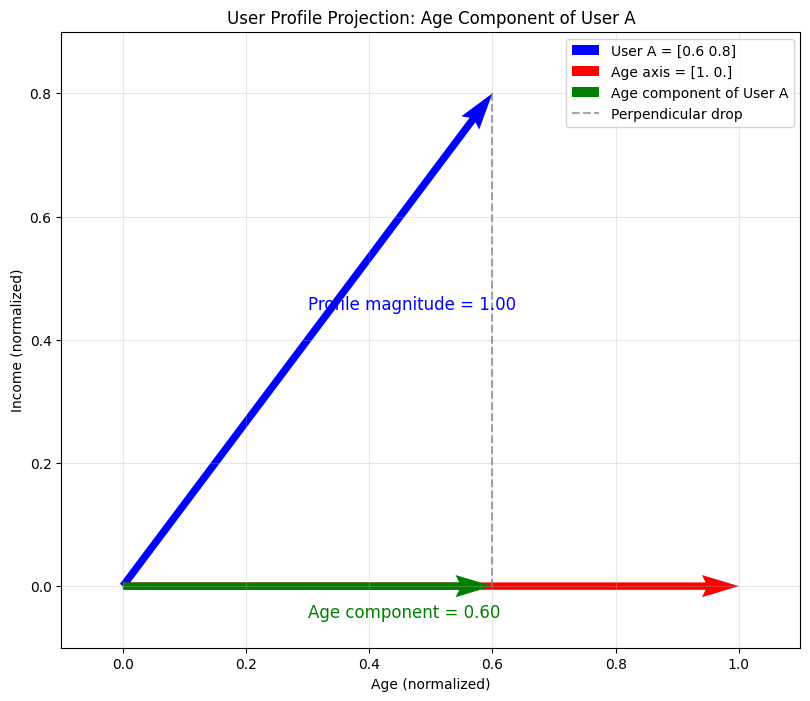

In [18]:
# Visualize the projection
plt.figure(figsize=(10, 8))

# Plot original vectors
plt.quiver(0, 0, user_a[0], user_a[1], angles='xy', scale_units='xy', scale=1, 
           color='blue', width=0.01, label=f'User A = {user_a}')
plt.quiver(0, 0, user_b[0], user_b[1], angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.01, label=f'Age axis = {user_b}')

# Plot the projection
plt.quiver(0, 0, vector_proj[0], vector_proj[1], angles='xy', scale_units='xy', scale=1, 
           color='green', width=0.01, label=f'Age component of User A')

# Draw the "shadow" line (perpendicular from user_a to its projection)
plt.plot([user_a[0], vector_proj[0]], [user_a[1], vector_proj[1]], 
         'gray', linestyle='--', alpha=0.7, label='Perpendicular drop')

# Add annotations
plt.annotate(f'Profile magnitude = {np.linalg.norm(user_a):.2f}', 
             xy=(user_a[0]/2, user_a[1]/2 + 0.05), fontsize=12, color='blue')
plt.annotate(f'Age component = {scalar_proj:.2f}', 
             xy=(vector_proj[0]/2, -0.05), fontsize=12, color='green')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 0.9)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('User Profile Projection: Age Component of User A')
plt.xlabel('Age (normalized)')
plt.ylabel('Income (normalized)')
plt.gca().set_aspect('equal')
plt.show()


In [19]:
# Let's explore different user profile projection scenarios
user_scenarios = [
    ("Similar users", [0.6, 0.8], [0.8, 0.6]),  # Similar age/income profiles
    ("Age-focused vs Income-focused", [0.9, 0.1], [0.1, 0.9]),  # Perpendicular preferences
    ("Opposite profiles", [0.8, 0.9], [-0.4, -0.45]),  # Opposite directions (scaled)
    ("Young high-earner onto age axis", [0.2, 0.9], [1.0, 0.0])  # Project onto pure age
]

print("=== USER PROFILE PROJECTION SCENARIOS ===")
for name, user_a, reference_dir in user_scenarios:
    scalar_proj, vector_proj = project_vector(np.array(user_a), np.array(reference_dir))
    dot_product = np.dot(user_a, reference_dir)

    print(f"\n{name}:")
    print(f"  User profile = {user_a} (age_norm, income_norm)")
    print(f"  Reference direction = {reference_dir}")
    print(f"  Dot product = {dot_product:.3f}")
    print(f"  Scalar projection = {scalar_proj:.3f}")
    print(f"  Vector projection = [{vector_proj[0]:.3f}, {vector_proj[1]:.3f}]")


=== USER PROFILE PROJECTION SCENARIOS ===

Similar users:
  User profile = [0.6, 0.8] (age_norm, income_norm)
  Reference direction = [0.8, 0.6]
  Dot product = 0.960
  Scalar projection = 0.960
  Vector projection = [0.768, 0.576]

Age-focused vs Income-focused:
  User profile = [0.9, 0.1] (age_norm, income_norm)
  Reference direction = [0.1, 0.9]
  Dot product = 0.180
  Scalar projection = 0.199
  Vector projection = [0.022, 0.198]

Opposite profiles:
  User profile = [0.8, 0.9] (age_norm, income_norm)
  Reference direction = [-0.4, -0.45]
  Dot product = -0.725
  Scalar projection = -1.204
  Vector projection = [0.800, 0.900]

Young high-earner onto age axis:
  User profile = [0.2, 0.9] (age_norm, income_norm)
  Reference direction = [1.0, 0.0]
  Dot product = 0.200
  Scalar projection = 0.200
  Vector projection = [0.200, 0.000]



=== ML APPLICATION: FEATURE EXTRACTION ===
Data points (customers): 
[[2 3]
 [1 4]
 [3 2]
 [4 1]
 [1 1]]
Direction of interest: [0.70710678 0.70710678]
Projected values (1D features): [3.53553391 3.53553391 3.53553391 3.53553391 1.41421356]


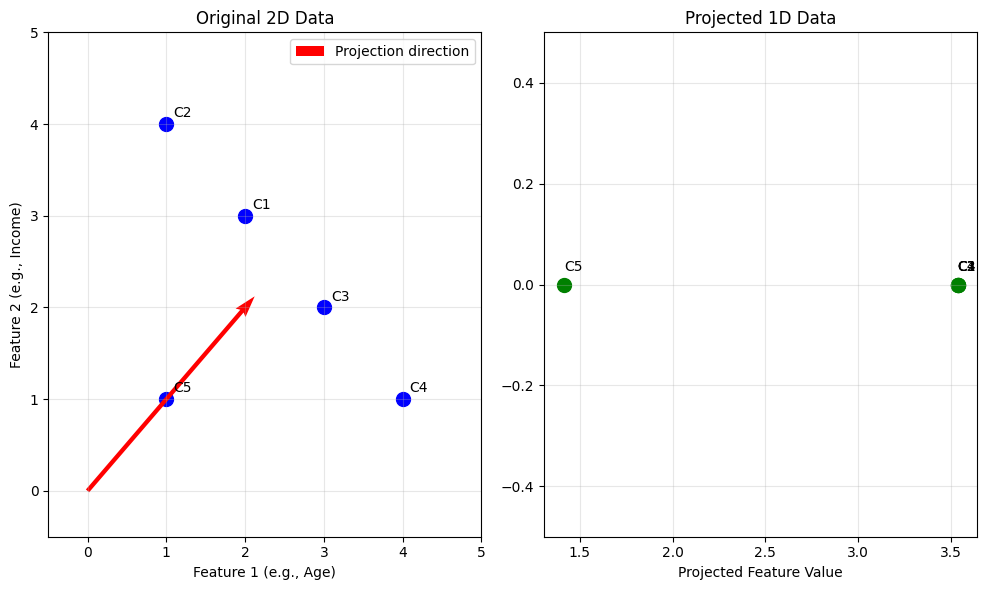


=== KEY INSIGHTS ===
• Projection reduces dimensionality while preserving important information
• The projection direction determines what aspects of data we emphasize
• This is the foundation of techniques like PCA (Principal Component Analysis)
• In ML, we often project high-dimensional data to lower dimensions for visualization and efficiency


In [20]:
# ML Application: Feature extraction using projection
print("\n=== ML APPLICATION: FEATURE EXTRACTION ===")

# Simulate some 2D data points (could be customer features, image features, etc.)
data_points = np.array([
    [2, 3],   # Customer 1: [age_normalized, income_normalized]
    [1, 4],   # Customer 2
    [3, 2],   # Customer 3
    [4, 1],   # Customer 4
    [1, 1]    # Customer 5
])

# Define a "direction of interest" (could be discovered by PCA, domain knowledge, etc.)
direction = np.array([1, 1])  # Equal weight to age and income
direction = direction / np.linalg.norm(direction)  # Normalize

print(f"Data points (customers): \n{data_points}")
print(f"Direction of interest: {direction}")

# Project all data points onto this direction
projections = []
for point in data_points:
    scalar_proj, vector_proj = project_vector(point, direction)
    projections.append(scalar_proj)

projections = np.array(projections)
print(f"Projected values (1D features): {projections}")

# Visualize
plt.figure(figsize=(10, 6))

# Plot original 2D data
plt.subplot(1, 2, 1)
plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', s=100)
plt.quiver(0, 0, direction[0]*3, direction[1]*3, angles='xy', scale_units='xy', scale=1, 
           color='red', width=0.01, label='Projection direction')
for i, point in enumerate(data_points):
    plt.annotate(f'C{i+1}', xy=point, xytext=(5, 5), textcoords='offset points')
plt.xlim(-0.5, 5)
plt.ylim(-0.5, 5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Original 2D Data')
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Income)')

# Plot projected 1D data
plt.subplot(1, 2, 2)
plt.scatter(projections, np.zeros_like(projections), c='green', s=100)
for i, proj in enumerate(projections):
    plt.annotate(f'C{i+1}', xy=(proj, 0), xytext=(0, 10), textcoords='offset points')
plt.ylim(-0.5, 0.5)
plt.grid(True, alpha=0.3)
plt.title('Projected 1D Data')
plt.xlabel('Projected Feature Value')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("\n=== KEY INSIGHTS ===")
print("• Projection reduces dimensionality while preserving important information")
print("• The projection direction determines what aspects of data we emphasize")
print("• This is the foundation of techniques like PCA (Principal Component Analysis)")
print("• In ML, we often project high-dimensional data to lower dimensions for visualization and efficiency")


## ✖️ <span style="color: #673AB7;">Matrix Multiplication</span>

<div class="nb-bg-advanced-light">

<div style="background-color: #FFFFFF; border-left: 4px solid #673AB7; padding: 20px; border-radius: 5px; margin-bottom: 20px;">
<strong style="color: #512DA8; font-size: 1.1em;">Matrix multiplication combines transformations and is fundamental to machine learning operations.</strong>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px; margin: 15px 0;">
<div style="background-color: #FFEBEE; border-left: 4px solid #F44336; padding: 15px; border-radius: 5px; margin-bottom: 15px;">
<strong class="nb-text-error">⚠️ Remember: Order matters!</strong> <span class="nb-text-primary"><strong>AB</strong> ≠ <strong>BA</strong> in general.</span>
<div style="background-color: #FFF3E0; border-radius: 3px; padding: 5px; margin: 5px 0; font-size: 0.9em;">
<strong class="nb-text-warning">Notation:</strong> <span class="nb-text-primary">≠ means "not equal to"</span>
</div>
</div>

<div style="background-color: #E3F2FD; border-left: 4px solid #2196F3; padding: 15px; border-radius: 5px;">
<strong class="nb-text-technical">📐 Dimension Rule:</strong> <span class="nb-text-primary">When we multiply an <strong>m×n</strong> matrix <strong>A</strong> by an <strong>n×p</strong> matrix <strong>B</strong>, we get an <strong>m×p</strong> matrix <strong>C</strong>.</span>
</div>
</div>

</div>


In [21]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Multiply matrices
C = np.dot(A, B)
print("A @ B =\n", C)

# Let's verify that order matters
C_reverse = np.dot(B, A)
print("\nB @ A =\n", C_reverse)
print(f"\nAre they equal? {np.array_equal(C, C_reverse)}")

# Let's understand what matrix multiplication does geometrically
# A matrix transforms vectors - let's see how
test_vector = np.array([1, 0])  # Unit vector along x-axis
transformed = A @ test_vector
print(f"\nOriginal vector: {test_vector}")
print(f"After transformation by A: {transformed}")

# The identity matrix does nothing (like multiplying by 1)
I = np.eye(2)  # 2x2 identity matrix
print(f"\nIdentity matrix:\n{I}")
print(f"I @ test_vector = {I @ test_vector}")  # Should be unchanged

A @ B =
 [[19 22]
 [43 50]]

B @ A =
 [[23 34]
 [31 46]]

Are they equal? False

Original vector: [1 0]
After transformation by A: [1 3]

Identity matrix:
[[1. 0.]
 [0. 1.]]
I @ test_vector = [1. 0.]


## 🧠 <span style="color: #FF9800;">Visualizing Transformations</span>

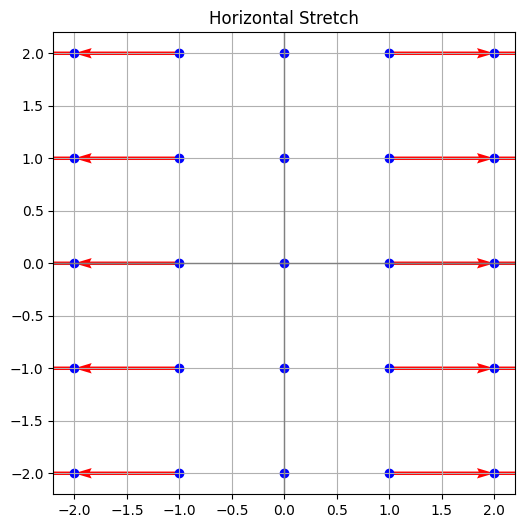

In [22]:
import matplotlib.pyplot as plt

def plot_transform(A, title="Transformation"):
    grid = np.array([[x, y] for x in range(-2, 3) for y in range(-2, 3)])
    transformed = grid @ A.T

    plt.figure(figsize=(6,6))
    plt.quiver(grid[:, 0], grid[:, 1], transformed[:, 0] - grid[:, 0], transformed[:, 1] - grid[:, 1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.scatter(grid[:, 0], grid[:, 1], color='blue')
    plt.title(title)
    plt.grid(True)
    plt.axhline(0, color='gray', lw=1)
    plt.axvline(0, color='gray', lw=1)
    plt.gca().set_aspect('equal')
    plt.show()

plot_transform(np.array([[2, 0], [0, 1]]), title="Horizontal Stretch")

## ✅ <span style="color: #4CAF50;">Summary Quiz & Checklist</span>

### 🧪 <span style="color: #9C27B0;">Quiz Questions</span>

<div class="nb-bg-advanced-light">

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<strong class="nb-text-advanced">1. What does matrix multiplication represent geometrically?</strong>
<div style="background-color: #E8F5E8; border-left: 4px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 5px;">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">Matrix multiplication represents the composition of linear transformations. Each matrix transforms space in some way (stretch, rotate, reflect, etc.), and multiplying matrices combines these transformations.</span>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<strong class="nb-text-advanced">2. What happens when you dot a vector with itself?</strong>
<div style="background-color: #E8F5E8; border-left: 4px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 5px;">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">You get the squared magnitude (length) of the vector: <strong>v</strong> · <strong>v</strong> = ||<strong>v</strong>||²</span>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<strong class="nb-text-advanced">3. Which operations preserve direction?</strong>
<div style="background-color: #E8F5E8; border-left: 4px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 5px;">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">Scalar multiplication by positive numbers preserves direction. Matrix transformations may or may not preserve direction depending on the matrix.</span>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; margin: 15px 0;">
<strong class="nb-text-advanced">4. Why does <strong>AB</strong> ≠ <strong>BA</strong> in general?</strong>
<div style="background-color: #E8F5E8; border-left: 4px solid #4CAF50; padding: 10px; margin: 10px 0; border-radius: 5px;">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">Because matrix multiplication represents composition of transformations, and the order of transformations matters. Rotating then stretching gives a different result than stretching then rotating.</span>
</div>
</div>

</div>

## 🎨 <span style="color: #E91E63;">Analogies & Intuition</span>

<div class="nb-bg-analogy-light">

<div style="background-color: #FFFFFF; border-left: 4px solid #E91E63; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<strong style="color: #C2185B; font-size: 1.1em;">🧠 Think of these concepts in everyday terms to build intuition</strong>
</div>

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px;">

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px;">
<h4 style="color: #4CAF50; margin-top: 0;">⚫ Dot Product</h4>
<div style="background-color: #E8F5E8; border-radius: 5px; padding: 15px;">
<p style="color: #424242; margin: 0;">Like comparing how much two people are walking in the same direction. If they're walking together, the dot product is large. If one goes left and one goes right, it's zero.</p>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px;">
<h4 style="color: #FF9800; margin-top: 0;">🔄 Matrix as Transformation</h4>
<div style="background-color: #FFF3E0; border-radius: 5px; padding: 15px;">
<p style="color: #424242; margin: 0;">Picture gridlines bending, stretching, or rotating after a matrix is applied. The matrix is like a lens that warps space.</p>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px;">
<h4 style="color: #2196F3; margin-top: 0;">🆔 Identity Matrix</h4>
<div style="background-color: #E3F2FD; border-radius: 5px; padding: 15px;">
<p style="color: #424242; margin: 0;">Like multiplying by 1; it does nothing. It's the "do nothing" transformation that leaves everything unchanged.</p>
</div>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 20px;">
<h4 style="color: #9E9E9E; margin-top: 0;">⚫ Zero Matrix</h4>
<div style="background-color: #F5F5F5; border-radius: 5px; padding: 15px;">
<p style="color: #424242; margin: 0;">Like muting all output. Everything becomes zero - it's the "black hole" of transformations.</p>
</div>
</div>

</div>
</div>


## 🎯 <span style="color: #FF5722;">Tutor Instructions</span>

<div class="nb-tutor-instructions">

<div class="nb-card-accent">
<strong class="nb-text-warning nb-text-lg">📚 Teaching Strategies and Interactive Learning Approaches</strong>
</div>

<h3 class="nb-header-warning">🎓 Teaching Prompts</h3>
<div class="nb-card">
<ul class="nb-text-primary">
<li>Ask the student: <strong class="nb-text-warning">"If the dot product is zero, what can we say about the angle between the vectors?"</strong></li>
<li>Have the student sketch a 2D vector and visualize what happens when you apply a matrix that doubles x-values and halves y-values.</li>
<li>Encourage drawing: <strong class="nb-text-warning">"Show me what a rotation matrix does to this square."</strong></li>
</ul>
</div>

<h3 class="nb-header-warning">🧠 Pop Quiz Strategy</h3>
<div class="nb-card">
<ul class="nb-text-primary">
<li>Interleave memory questions from later topics (e.g., <strong class="nb-text-warning">"Can you see how the dot product comes back in neural networks?"</strong>).</li>
<li>Use "what-if" questions: <strong class="nb-text-warning">"What if the transformation matrix is all zeros?"</strong></li>
</ul>
</div>

</div>


## 🧪 <span style="color: #9C27B0;">Quiz Questions (with Answers)</span>

<div class="nb-quiz">

<div class="nb-quiz-question">
<strong class="nb-text-advanced">Q1.</strong> <span class="nb-text-primary">What does the dot product measure?</span>
<div class="nb-answer-correct">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">Alignment / cosine similarity between vectors</span>
</div>
</div>

<div class="nb-quiz-question">
<strong class="nb-text-advanced">Q2.</strong> <span class="nb-text-primary">What is the result of dotting a vector with itself?</span>
<div class="nb-answer-correct">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">The squared magnitude of the vector</span>
</div>
</div>

<div class="nb-quiz-question">
<strong class="nb-text-advanced">Q3.</strong> <span class="nb-text-primary">What kind of transformation does this matrix perform?</span>

<div class="nb-formula">
<strong class="nb-text-advanced">Matrix: [[2, 0], [0, 1]]</strong>
</div>

<div style="background-color: #FFF8E1; border-radius: 5px; padding: 10px; margin: 10px 0;">
<strong class="nb-text-warning">📐 Matrix notation explanation:</strong>
<ul class="nb-text-primary" style="margin: 5px 0; font-size: 0.9em;">
<li><strong>[ ]</strong>: Square brackets indicate a matrix</li>
<li><strong>Rows and columns</strong>: Numbers arranged horizontally and vertically</li>
<li><strong>2 × 2 matrix</strong>: 2 rows and 2 columns</li>
<li><strong>Matrix elements</strong>: Each number has a position (row, column)</li>
</ul>
</div>

<div class="nb-answer-correct">
<strong class="nb-text-success">✅ Answer:</strong> <span class="nb-text-primary">Horizontal stretching (x-dimension doubled)</span>
</div>
</div>

<div class="nb-quiz-question">
<strong class="nb-text-advanced">Q4.</strong> <span class="nb-text-primary">Can matrix multiplication be commutative?</span>
<div class="nb-answer-incorrect">
<strong class="nb-text-error">❌ Answer:</strong> <span class="nb-text-primary">No, <strong>AB</strong> ≠ <strong>BA</strong> in general</span>
<div style="background-color: #FFF3E0; border-radius: 3px; padding: 5px; margin: 5px 0; font-size: 0.9em;">
<strong class="nb-text-warning">Notation:</strong> <span class="nb-text-primary">≠ means "not equal to"</span>
</div>
</div>
</div>

</div>


## ✅ <span style="color: #4CAF50;">Summary Checklist</span>

<div style="background-color: #E8F5E8; border-radius: 10px; padding: 20px; margin: 20px 0;">

<div style="background-color: #FFFFFF; border-left: 4px solid #4CAF50; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<strong style="color: #2E7D32; font-size: 1.1em;">🎯 Check your understanding of linear algebra fundamentals</strong>
</div>

<div style="display: grid; grid-template-columns: 1fr; gap: 10px;">

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; display: flex; align-items: center;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I understand what <strong style="color: #1976D2;">vectors</strong> and <strong style="color: #7B1FA2;">matrices</strong> are</span>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; display: flex; align-items: center;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can compute a <strong style="color: #4CAF50;">dot product</strong> and explain its meaning</span>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; display: flex; align-items: center;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can multiply two matrices and describe the <strong style="color: #FF9800;">geometric effect</strong></span>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; display: flex; align-items: center;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can visualize <strong style="color: #673AB7;">matrix transformations</strong> on a 2D grid</span>
</div>

<div style="background-color: #FFFFFF; border-radius: 8px; padding: 15px; display: flex; align-items: center;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can explain why <strong style="color: #F44336;"><strong>AB</strong> ≠ <strong>BA</strong></strong></span>
</div>

</div>

<div style="background-color: #E1F5FE; border-left: 4px solid #2196F3; padding: 15px; margin: 15px 0; border-radius: 5px;">
<strong class="nb-text-technical">🚀 Next Steps:</strong> <span class="nb-text-primary">Once you've checked all boxes, you're ready to dive deeper into machine learning applications of linear algebra!</span>
</div>

</div>


### ✅ <span style="color: #4CAF50;">Comprehensive Self-Assessment Checklist</span>

<div style="background-color: #E8F5E8; border-radius: 10px; padding: 20px; margin: 20px 0;">

<div style="background-color: #FFFFFF; border-left: 4px solid #4CAF50; padding: 15px; border-radius: 5px; margin-bottom: 20px;">
<strong style="color: #2E7D32; font-size: 1.1em;">🎯 Check off each item as you master it:</strong>
</div>

<div style="display: grid; grid-template-columns: 1fr; gap: 10px;">

<div class="nb-card">
<h5 style="color: #1976D2; margin-top: 0;">🧠 Vector Fundamentals</h5>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I understand what <strong style="color: #1976D2;">vectors</strong> are: mathematical objects with magnitude and direction</span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can explain why vectors are central to <strong style="color: #4CAF50;">machine learning</strong></span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can give concrete examples of how different <strong style="color: #FF9800;">data types</strong> become vectors</span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can visualize vectors as <strong style="color: #9C27B0;">arrows in space</strong></span>
</div>
</div>

<div class="nb-card">
<h5 style="color: #7B1FA2; margin-top: 0;">🔗 Vector Relationships</h5>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I understand what <strong style="color: #7B1FA2;">angles between vectors</strong> represent</span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can compute and interpret <strong style="color: #4CAF50;">dot products</strong></span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can connect vector similarity to <strong style="color: #FF9800;">real ML applications</strong></span>
</div>
</div>

<div class="nb-card">
<h5 style="color: #FF5722; margin-top: 0;">⚙️ Mathematical Operations</h5>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can multiply two matrices and describe the <strong style="color: #FF9800;">geometric effect</strong></span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can visualize <strong style="color: #673AB7;">matrix transformations</strong> on a 2D grid</span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can explain why <strong style="color: #F44336;"><strong>AB</strong> ≠ <strong>BA</strong></strong></span>
</div>
</div>

<div class="nb-card">
<h5 style="color: #4CAF50; margin-top: 0;">🤖 ML Connections</h5>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I can connect these concepts to <strong style="color: #4CAF50;">machine learning applications</strong></span>
</div>
<div style="display: flex; align-items: center; margin: 5px 0;">
<input type="checkbox" style="margin-right: 10px; transform: scale(1.2);">
<span class="nb-text-primary">I understand how vectors represent <strong style="color: #1976D2;">data points in feature spaces</strong></span>
</div>
</div>

</div>

<div style="background-color: #E1F5FE; border-left: 4px solid #2196F3; padding: 15px; margin: 15px 0; border-radius: 5px;">
<strong class="nb-text-technical">🚀 Next Steps:</strong> <span class="nb-text-primary">Once you've checked all boxes, you're ready to dive deeper into machine learning applications of linear algebra!</span>
</div>

</div>

### 🔗 <span style="color: #FF5722;">Next Steps</span>

<div style="background-color: #FFF3E0; border-radius: 8px; padding: 15px; margin: 15px 0;">
<ul style="color: #424242; margin: 0;">
<li>🧮 Practice with different transformation matrices and explore their geometric effects</li>
<li>🧠 Think about how these concepts might apply to neural networks (hint: they're everywhere!)</li>
<li>📚 Move on to the next module: Probability & Statistics for Machine Learning</li>
<li>🔬 Try implementing these concepts with your own datasets and examples</li>
</ul>
</div>

### 💡 <span style="color: #9C27B0;">Key Takeaways</span>

<div class="nb-bg-advanced-light">

<div class="nb-grid-custom">

<div class="nb-card">
<h6 class="nb-text-technical nb-margin-top-0">📊 Vectors</h6>
<p style="color: #424242; margin: 0; font-size: 0.9em;">Quantities with direction and magnitude</p>
</div>

<div class="nb-card">
<h6 class="nb-text-advanced nb-margin-top-0">🔲 Matrices</h6>
<p style="color: #424242; margin: 0; font-size: 0.9em;">Functions that transform space</p>
</div>

<div class="nb-card">
<h6 class="nb-text-success nb-margin-top-0">⚫ Dot Product</h6>
<p style="color: #424242; margin: 0; font-size: 0.9em;">Measures alignment between vectors</p>
</div>

<div class="nb-card">
<h6 class="nb-text-warning nb-margin-top-0">✖️ Matrix Multiplication</h6>
<p style="color: #424242; margin: 0; font-size: 0.9em;">Combines transformations (order matters!)</p>
</div>

</div>

<div class="nb-insight">
<strong class="nb-text-success">🎯 Geometric Intuition:</strong> <span class="nb-text-primary">Always try to visualize what's happening in space!</span>
</div>

</div>
